# Analysis School Data

In [1]:
# Import the required libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import numpy as np

In [2]:
#Import School Data
#encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'cp1252', 'utf-16']

file_path = "Cleaned_Data/school_clean_final.csv"
schools_df = pd.read_csv(file_path, encoding="utf-8")

schools_df

,POST_CODE,MUNICIPALITY,CITY_SHIRE,SUBURB_GROUP,Education_Sector,School_Name,School_Type,Longitude,Latitude,SUBURB_NAMES
0,3053,Inner City municipalities and their suburbs,City of Melbourne,Inner,Government,Carlton Gardens Primary School,Primary,144.96951,-37.80205,Carlton
1,3053,Inner City municipalities and their suburbs,City of Melbourne,Inner,Government,Carlton Primary School,Primary,144.97045,-37.79560,Carlton
2,3054,Inner City municipalities and their suburbs,City of Yarra,Inner,Government,Carlton North Primary School,Primary,144.97303,-37.79106,"Carlton North, Carlton North, Princes Hill"
3,3054,Inner City municipalities and their suburbs,City of Yarra,Inner,Government,Princes Hill Primary School,Primary,144.96810,-37.78040,"Carlton North, Carlton North, Princes Hill"
4,3054,Inner City municipalities and their suburbs,City of Yarra,Inner,Government,Princes Hill Secondary College,Secondary,144.96503,-37.78348,"Carlton North, Carlton North, Princes Hill"
...,...,...,...,...,...,...,...,...,...,...
1249,3024,Western municipalities and their suburbs,City of Wyndham,Outer,Government,Iramoo Primary School,Primary,144.62857,-37.89587,"Manor Lakes, Wyndham Vale, Mambourin"
1250,3024,Western municipalities and their suburbs,City of Wyndham,Outer,Government,Wyndham Vale Primary School,Primary,144.60961,-37.89556,"Manor Lakes, Wyndham Vale, Mambourin"
1251,3024,Western municipalities and their suburbs,City of Wyndham,Outer,Government,Riverbend Primary School,Primary,144.62526,-37.87668,"Manor Lakes, Wyndham Vale, Mambourin"
1252,3024,Western municipalities and their suburbs,City of Wyndham,Outer,Government,Manor Lakes P-12 College,Pri/Sec,144.60185,-37.87351,"Manor Lakes, Wyndham Vale, Mambourin"


In [3]:
# Group the DataFrame by 'POST_CODE' and 'School_Types' and calculate the count of unique SCHOOL_NAME
schools_by_postcode_type = schools_df.groupby(['POST_CODE', 'School_Type'])['School_Name'].nunique().reset_index()

# Pivot the DataFrame to create separate columns for each School_Types
schools_pivoted = schools_by_postcode_type.pivot_table(index='POST_CODE', columns='School_Type', values='School_Name', fill_value=0)

# Display the pivoted DataFrame
print(schools_pivoted)

School_Type  Language  Pri/Sec  Primary  Secondary  Special
POST_CODE                                                  
3003                0        0        0          1        0
3011                0        0        5          1        0
3012                0        0        3          0        0
3013                0        0        4          0        1
3015                0        0        6          0        0
...               ...      ...      ...        ...      ...
3975                0        0        3          0        0
3976                0        0        5          1        0
3977                0        2       17          5        1
3978                0        1        7          2        0
3981                0        0        3          1        0

[193 rows x 5 columns]


In [4]:
# Calculate the measures of central tendency for each column in schools_pivoted
central_tendency_per_column = pd.DataFrame()

for column in schools_pivoted.columns:
    central_tendency = schools_pivoted[column].agg(['sum', 'mean', 'median', lambda x: x.mode().iat[0]], skipna=True)
    central_tendency_per_column[column] = central_tendency

# Display the measures of central tendency per column
print(central_tendency_per_column)

          Language     Pri/Sec     Primary   Secondary    Special
sum       4.000000  137.000000  818.000000  217.000000  78.000000
mean      0.020725    0.709845    4.238342    1.124352   0.404145
median    0.000000    0.000000    4.000000    1.000000   0.000000
<lambda>  0.000000    0.000000    2.000000    1.000000   0.000000


In [5]:
## so on average there is around 4 primary schools per suburb, 1 highschool.
## Language, Pri/Sec and Special Schools are rare.

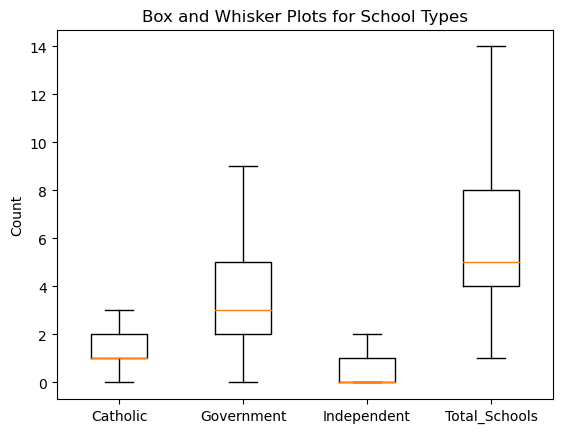

In [37]:
#add dots for outliers.........
# Remove the 'POST_CODE' column from schools_pivoted
schools_pivoted.drop('POST_CODE', axis=1, inplace=True)

# Create a list of data for each school type
data = [schools_pivoted[column].values for column in schools_pivoted.columns]

# Create a figure and axes
fig, ax = plt.subplots()

data_labels = schools_pivoted.columns

# Create the box and whisker plots
ax.boxplot(data, labels=data_labels, showfliers=False)

# Set the title and labels
ax.set_title('Box and Whisker Plots for School Types')
ax.set_ylabel('Count')

# Display the plot
plt.show()

In [6]:
# Group the DataFrame by 'POST_CODE' and 'Education_Sector' and calculate the count of unique School_Name
schools_by_sector_type = schools_df.groupby(['POST_CODE', 'Education_Sector'])['School_Name'].nunique().reset_index()

# Pivot the DataFrame to create separate columns for each School_Types
schools_pivot_2 = schools_by_sector_type.pivot_table(index='POST_CODE', columns='Education_Sector', values='School_Name', fill_value=0)

# Display the pivoted DataFrame
print(schools_pivot_2)

Education_Sector  Catholic  Government  Independent
POST_CODE                                          
3003                     1           0            0
3011                     2           4            0
3012                     2           1            0
3013                     1           4            0
3015                     2           3            1
...                    ...         ...          ...
3975                     1           2            0
3976                     1           5            0
3977                     3          20            2
3978                     1           7            2
3981                     1           3            0

[193 rows x 3 columns]


In [7]:
# Calculate the measures of central tendency for each column in schools_pivot_2
central_tendency_per_column_sector = pd.DataFrame()

for column in schools_pivot_2.columns:
    central_tendency = schools_pivot_2[column].agg(['sum', 'mean', 'median', lambda x: x.mode().iat[0]], skipna=True)
    central_tendency_per_column_sector[column] = central_tendency

# Display the measures of central tendency per column
print(central_tendency_per_column_sector)

            Catholic  Government  Independent
sum       299.000000  804.000000   151.000000
mean        1.549223    4.165803     0.782383
median      1.000000    3.000000     0.000000
<lambda>    1.000000    3.000000     0.000000


In [8]:
## on average there is usually 4 Government school, 2 catholic schools and 1 Independent school per postcode

In [9]:
# Filter the DataFrame for Suburb Group "Inner"
filtered_inner_df = schools_df[schools_df['SUBURB_GROUP'] == 'Inner']

# Group the filtered DataFrame by 'POST_CODE' and 'Education_Sector', and calculate the count
schools_by_sector_inner = filtered_inner_df.groupby(['POST_CODE', 'Education_Sector']).size().reset_index(name='School_Count')

# Pivot the DataFrame to make 'Education_Sector' columns
schools_pivoted_inner = schools_by_sector_inner.pivot(index='POST_CODE', columns='Education_Sector', values='School_Count')
schools_pivoted_inner

Education_Sector,Catholic,Government,Independent
POST_CODE,,,
3003,1.0,NaN,NaN
3051,3.0,1.0,1.0
3052,NaN,3.0,NaN
3053,NaN,2.0,NaN
3054,NaN,3.0,NaN
3065,2.0,1.0,NaN
3066,1.0,2.0,NaN
3067,NaN,1.0,1.0
3068,1.0,5.0,2.0


In [10]:
# Calculate the measures of central tendency for each column in schools_pivoted_inner - NEED TO DO FOR OTHER GROUPS MID OUTER -
central_tendency_per_column_inner = pd.DataFrame()

for column in schools_pivoted_inner.columns:
    central_tendency = schools_pivoted_inner[column].agg(['sum', 'mean', 'median', lambda x: x.mode().iat[0]], skipna=True)
    central_tendency_per_column_inner[column] = central_tendency

# Display the measures of central tendency per column
print(central_tendency_per_column_inner)

          Catholic  Government  Independent
sum           15.0     39.0000    13.000000
mean           1.5      2.4375     1.444444
median         1.0      2.0000     1.000000
<lambda>       1.0      1.0000     1.000000


In [11]:
## Inner suburbs on average have 2 Catholic Schools, 2 Government Schools, 1 Independent School

<Figure size 1200x600 with 0 Axes>

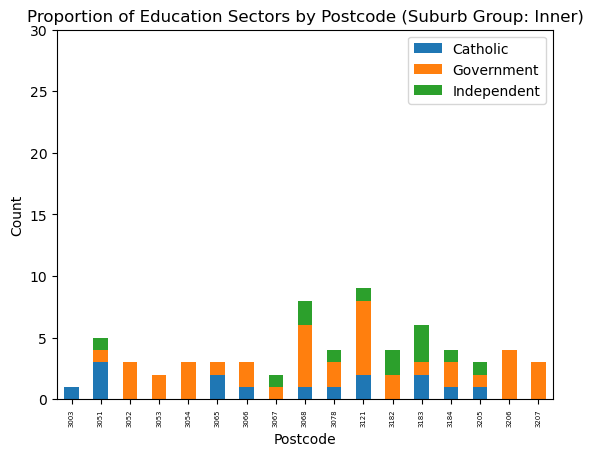

In [12]:
# Filter the DataFrame for Suburb Group "Inner"
filtered_inner_df = schools_df[schools_df['SUBURB_GROUP'] == 'Inner']

# Group the filtered DataFrame by 'POST_CODE' and 'Education_Sector', and calculate the count
schools_by_sector_inner = filtered_inner_df.groupby(['POST_CODE', 'Education_Sector']).size().reset_index(name='School_Count')

# Pivot the DataFrame to make 'Education_Sector' columns
schools_pivoted_inner = schools_by_sector_inner.pivot(index='POST_CODE', columns='Education_Sector', values='School_Count')

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width (12) and height (6) as desired

# Plotting the stacked bar chart
schools_pivoted_inner.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Proportion of Education Sectors by Postcode (Suburb Group: Inner)')
plt.xlabel('Postcode')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Adjust the x-axis labels size
plt.xticks(fontsize=5)

# Adjust the chart height
plt.ylim([0, 30])  # Adjust the y-axis limits as desired

# Display the chart
plt.show()

<Figure size 2000x600 with 0 Axes>

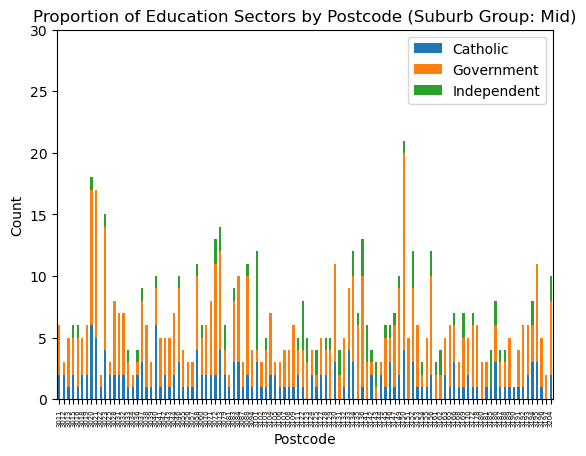

In [13]:
# Filter the DataFrame for Suburb Group "Inner"
filtered_mid_df = schools_df[schools_df['SUBURB_GROUP'] == 'Mid']

# Group the filtered DataFrame by 'POST_CODE' and 'Education_Sector', and calculate the count
schools_by_sector_mid = filtered_mid_df.groupby(['POST_CODE', 'Education_Sector']).size().reset_index(name='School_Count')

# Pivot the DataFrame to make 'Education_Sector' columns
schools_pivoted_mid = schools_by_sector_mid.pivot(index='POST_CODE', columns='Education_Sector', values='School_Count')

# Set the figure size
plt.figure(figsize=(20, 6))  # Adjust the width (12) and height (6) as desired

# Plotting the stacked bar chart
schools_pivoted_mid.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Proportion of Education Sectors by Postcode (Suburb Group: Mid)')
plt.xlabel('Postcode')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Adjust the x-axis labels size
plt.xticks(fontsize=5)

# Adjust the chart height
plt.ylim([0, 30])  # Adjust the y-axis limits as desired

# Display the chart
plt.show()

<Figure size 2000x600 with 0 Axes>

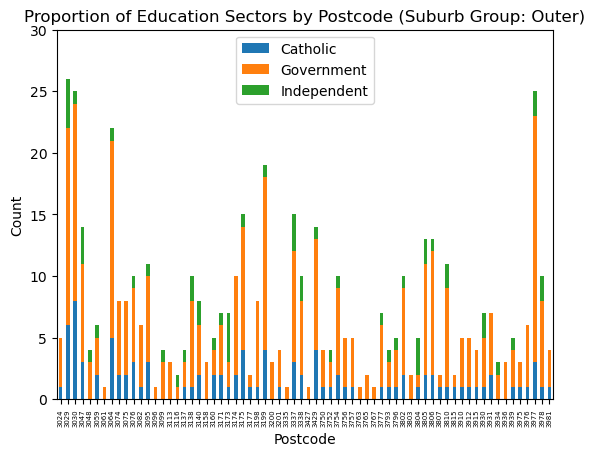

In [14]:
# Filter the DataFrame for Suburb Group "Inner"
filtered_outer_df = schools_df[schools_df['SUBURB_GROUP'] == 'Outer']

# Group the filtered DataFrame by 'POST_CODE' and 'Education_Sector', and calculate the count
schools_by_sector_outer = filtered_outer_df.groupby(['POST_CODE', 'Education_Sector']).size().reset_index(name='School_Count')

# Pivot the DataFrame to make 'Education_Sector' columns
schools_pivoted_outer = schools_by_sector_outer.pivot(index='POST_CODE', columns='Education_Sector', values='School_Count')

# Set the figure size
plt.figure(figsize=(20, 6))  # Adjust the width (12) and height (6) as desired

# Plotting the stacked bar chart
schools_pivoted_outer.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Proportion of Education Sectors by Postcode (Suburb Group: Outer)')
plt.xlabel('Postcode')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Adjust the x-axis labels size
plt.xticks(fontsize=5)

# Adjust the chart height
plt.ylim([0, 30])  # Adjust the y-axis limits as desired

# Display the chart
plt.show()

In [15]:
# Group the DataFrame by 'POST_CODE' and 'Education_Sector', and calculate the count
schools_by_sector = schools_df.groupby(['POST_CODE', 'Education_Sector']).size().reset_index(name='School_Count')

# Pivot the DataFrame to make 'Education_Sector' columns
schools_pivoted = schools_by_sector.pivot(index='POST_CODE', columns='Education_Sector', values='School_Count')

# Reset the index
schools_pivoted.reset_index(inplace=True)

# Replace NaN values with zero
schools_pivoted = schools_pivoted.fillna(0)

# Add a column for the total count of schools
schools_pivoted['Total_Schools'] = schools_pivoted.iloc[:, 1:].sum(axis=1)

# Print the result
print(schools_pivoted)

Education_Sector  POST_CODE  Catholic  Government  Independent  Total_Schools
0                      3003       1.0         0.0          0.0            1.0
1                      3011       2.0         4.0          0.0            6.0
2                      3012       2.0         1.0          0.0            3.0
3                      3013       1.0         4.0          0.0            5.0
4                      3015       2.0         3.0          1.0            6.0
..                      ...       ...         ...          ...            ...
188                    3975       1.0         2.0          0.0            3.0
189                    3976       1.0         5.0          0.0            6.0
190                    3977       3.0        20.0          2.0           25.0
191                    3978       1.0         7.0          2.0           10.0
192                    3981       1.0         3.0          0.0            4.0

[193 rows x 5 columns]


In [16]:
#Import house Data
#encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'cp1252', 'utf-16']

file_path = "Cleaned_Data/house_clean_final.csv"
house_df = pd.read_csv(file_path, encoding="utf-8")

# Keep only the "POST_CODE" and "2022" columns
house_df_2022 = house_df[['POST_CODE', '2022']]

# Display the DataFrame
print(house_df_2022)


     POST_CODE          2022
0         3101  2.850000e+06
1         3102  2.147500e+06
2         3103  2.925750e+06
3         3104  2.230000e+06
4         3122  2.475000e+06
..         ...           ...
188       3338  6.210000e+05
189       3427  6.505000e+05
190       3024  6.198333e+05
191       3029  6.266250e+05
192       3030  7.538000e+05

[193 rows x 2 columns]


In [17]:
# Merge schools_pivoted and house_df based on 'POST_CODE'
merged_df = pd.merge(schools_pivoted, house_df_2022, on='POST_CODE', how='left')
# Change the format of the '2022' column
#merged_df['2022'] = merged_df['2022'].map("{:.0f}".format)
# Convert the 'Median House Price' column to float
merged_df['2022'] = merged_df['2022'].astype(float)

# Display the merged DataFrame
print(merged_df)

     POST_CODE  Catholic  Government  Independent  Total_Schools          2022
0         3003       1.0         0.0          0.0            1.0  1.387500e+06
1         3011       2.0         4.0          0.0            6.0  1.020000e+06
2         3012       2.0         1.0          0.0            3.0  9.861250e+05
3         3013       1.0         4.0          0.0            5.0  8.716667e+05
4         3015       2.0         3.0          1.0            6.0  1.170833e+06
..         ...       ...         ...          ...            ...           ...
188       3975       1.0         2.0          0.0            3.0  8.812500e+05
189       3976       1.0         5.0          0.0            6.0  6.650000e+05
190       3977       3.0        20.0          2.0           25.0  7.769000e+05
191       3978       1.0         7.0          2.0           10.0  7.190000e+05
192       3981       1.0         3.0          0.0            4.0  7.000000e+05

[193 rows x 6 columns]


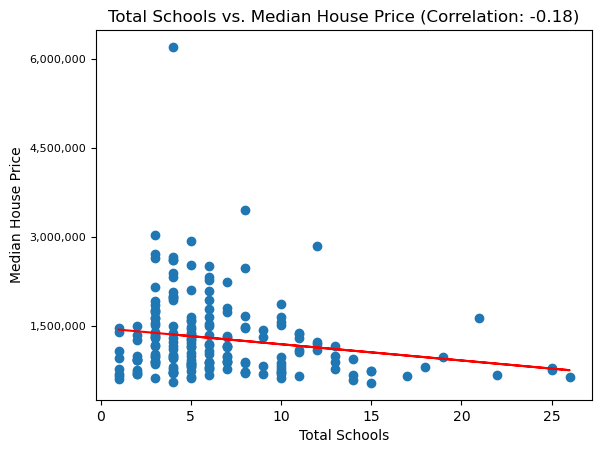

In [22]:
# Create a scatter plot
plt.scatter(merged_df['Total_Schools'], merged_df['2022'])

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Total_Schools'], merged_df['2022'])[0, 1]

# Add the trend line
trendline = np.polyfit(merged_df['Total_Schools'], merged_df['2022'], deg=1)
plt.plot(merged_df['Total_Schools'], np.polyval(trendline, merged_df['Total_Schools']), color='red')

# Set the title and labels
plt.title('Total Schools vs. Median House Price (Correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('Total Schools')
plt.ylabel('Median House Price')

# Adjust the size of the y-axis figures
plt.tick_params(axis='y', labelsize=8)  # Adjust the labelsize as desired

# Reduce the number of tick marks on the y-axis
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Adjust the number of bins as desired

# Format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

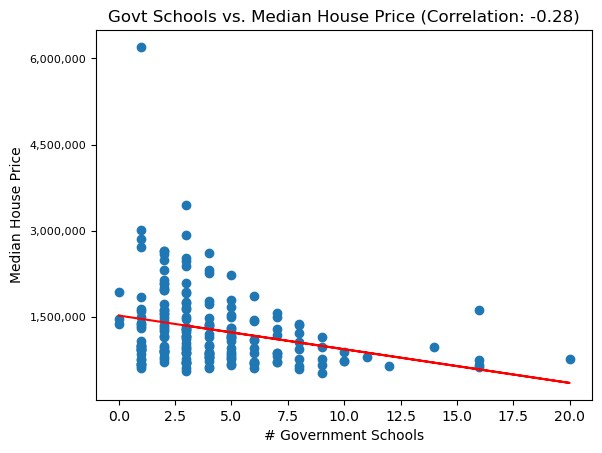

In [19]:
# Create a scatter plot
plt.scatter(merged_df['Government'], merged_df['2022'])

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Government'], merged_df['2022'])[0, 1]

# Add the trend line
trendline = np.polyfit(merged_df['Government'], merged_df['2022'], deg=1)
plt.plot(merged_df['Government'], np.polyval(trendline, merged_df['Government']), color='red')

# Set the title and labels
plt.title('Govt Schools vs. Median House Price (Correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('# Government Schools')
plt.ylabel('Median House Price')

# Adjust the size of the y-axis figures
plt.tick_params(axis='y', labelsize=8)  # Adjust the labelsize as desired

# Reduce the number of tick marks on the y-axis
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Adjust the number of bins as desired

# Format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

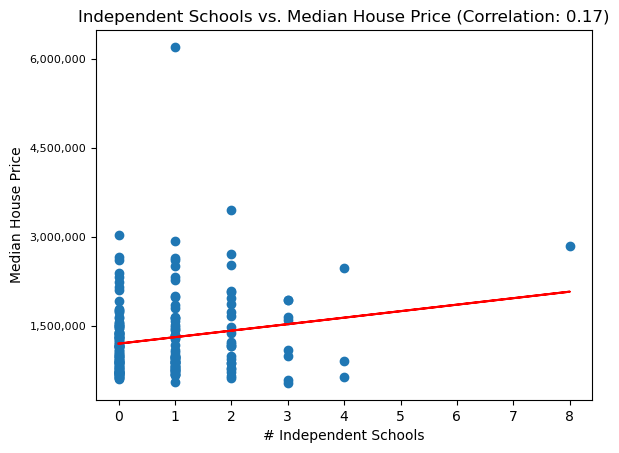

In [23]:
# Create a scatter plot
plt.scatter(merged_df['Independent'], merged_df['2022'])

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Independent'], merged_df['2022'])[0, 1]

# Add the trend line
trendline = np.polyfit(merged_df['Independent'], merged_df['2022'], deg=1)
plt.plot(merged_df['Independent'], np.polyval(trendline, merged_df['Independent']), color='red')

# Set the title and labels
plt.title('Independent Schools vs. Median House Price (Correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('# Independent Schools')
plt.ylabel('Median House Price')

# Adjust the size of the y-axis figures
plt.tick_params(axis='y', labelsize=8)  # Adjust the labelsize as desired

# Reduce the number of tick marks on the y-axis
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Adjust the number of bins as desired

# Format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

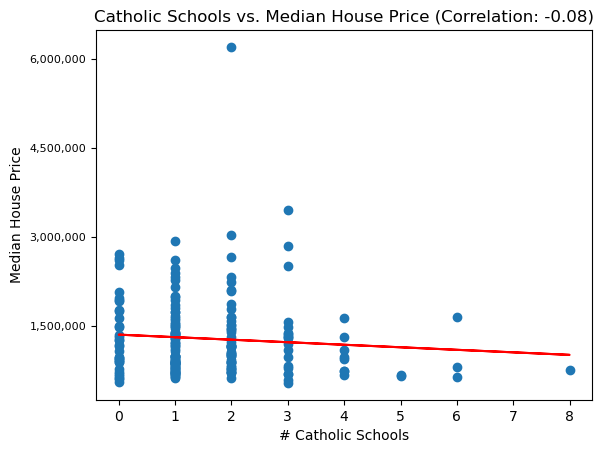

In [24]:
# Create a scatter plot
plt.scatter(merged_df['Catholic'], merged_df['2022'])

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Catholic'], merged_df['2022'])[0, 1]

# Add the trend line
trendline = np.polyfit(merged_df['Catholic'], merged_df['2022'], deg=1)
plt.plot(merged_df['Catholic'], np.polyval(trendline, merged_df['Catholic']), color='red')

# Set the title and labels
plt.title('Catholic Schools vs. Median House Price (Correlation: {:.2f})'.format(correlation_coefficient))
plt.xlabel('# Catholic Schools')
plt.ylabel('Median House Price')

# Adjust the size of the y-axis figures
plt.tick_params(axis='y', labelsize=8)  # Adjust the labelsize as desired

# Reduce the number of tick marks on the y-axis
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Adjust the number of bins as desired

# Format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()